Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


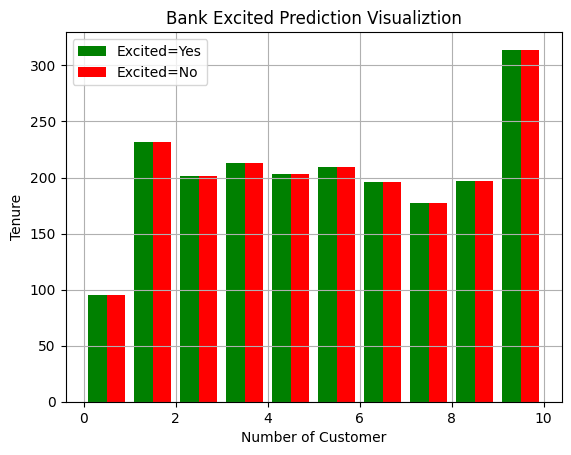

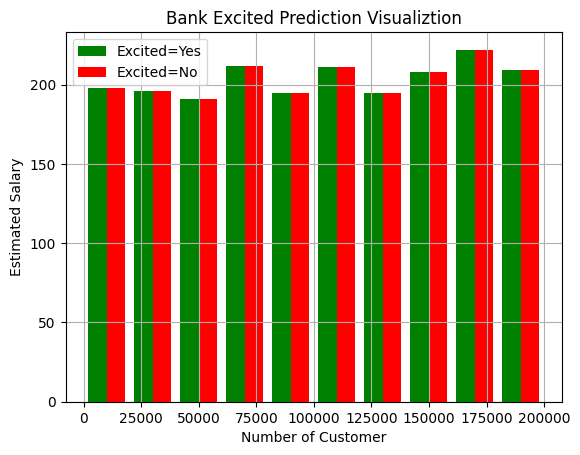




Epoch 1/5


250/250 [==============================] - 2s 3ms/step - loss: 0.5342 - accuracy: 0.7750
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4797 - accuracy: 0.7979
Epoch 3/5
250/250 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7980
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4577 - accuracy: 0.8034
Epoch 5/5
250/250 [==============================] - 1s 2ms/step - loss: 0.4496 - accuracy: 0.8062
Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4412 - accuracy: 0.8138
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4341 - accuracy: 0.8151
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4270 - accuracy: 0.8164
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8191
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.

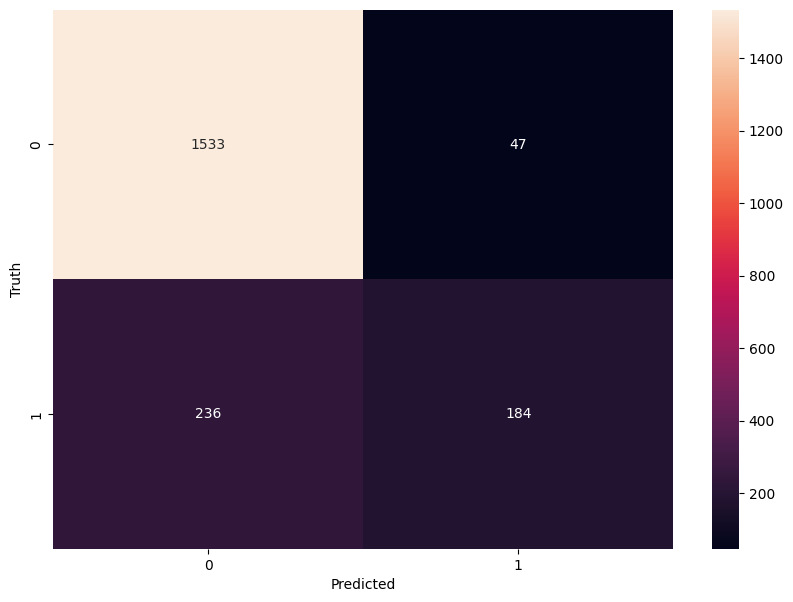

In [1]:
# %%
import pandas as pd

df = pd.read_csv('./Churn_Modelling.csv')

# %%
df.head()

# %%
df.drop(columns=['CustomerId', 'RowNumber', 'Surname'], inplace=True)

# %%
df.head()

# %%
for col in df:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].unique()}')

# %%
df.dtypes

# %%
df.isnull().sum()

# %%
df['Geography'].unique()

# %%
geo = pd.get_dummies(df['Geography']).astype('int')

# %%
geo

# %%
df.drop(columns='Geography', inplace=True)

# %%
df = pd.concat([df, geo], axis='columns')

# %%
df.head()

# %%
df['Gender'].unique()

# %%
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)

# %%
df.head()

# %%
excited_Yes = df[df['Exited'] == 1].Tenure	
excited_No = df[df['Exited'] == 1].Tenure	

# %%
import matplotlib.pyplot as plt
plt.hist([excited_Yes, excited_No], color=['green', 'red'], label=['Excited=Yes','Excited=No'])
plt.title("Bank Excited Prediction Visualiztion")
plt.xlabel("Number of Customer")
plt.ylabel("Tenure")
plt.grid(True)
plt.legend()
plt.show()

# %%
S_excited_Yes = df[df['Exited'] == 1].EstimatedSalary	
S_excited_No = df[df['Exited'] == 1].EstimatedSalary	
plt.hist([S_excited_Yes, S_excited_No], color=['green', 'red'], label=['Excited=Yes','Excited=No'])
plt.title("Bank Excited Prediction Visualiztion")
plt.xlabel("Number of Customer")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.legend()
plt.show()

# %%
df.dtypes

# %%
df.head()
df.shape

# %%
from sklearn.preprocessing import MinMaxScaler
minmiax = MinMaxScaler()
col_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df[col_to_scale] = minmiax.fit_transform(df[col_to_scale])

df.head()

# %%
from sklearn.model_selection import train_test_split


X = df.drop(columns='Exited', axis='columns')
Y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# %%
x_train.shape

# %%
x_test.shape

# %%
len(x_train.columns)

# %%
from tensorflow import keras

# %%
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(9,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])

# %%
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# %%
model.fit(x_train, y_train, epochs=5)

# %%
model.fit(x_train, y_train, epochs=100)

# %%
model.evaluate(x_test, y_test)

# %%
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

# %%
y_pred[:10]

# %%
y_test[:10]

# %%
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

# %%
import seaborn as sns
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")
plt.show()




In [2]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1580
           1       0.80      0.44      0.57       420

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



### Method 1: Undersampling

In [4]:
count_class_0, count_class_1 = df['Exited'].value_counts()

In [5]:
count_class_0, count_class_1

(7963, 2037)

In [6]:
df_class_0 = df[df['Exited'] == 0]
df_class_1 = df[df['Exited'] == 1]

In [7]:
df_class_0_undeer = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_undeer, df_class_1], axis=0)

In [8]:
df_test_under['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [13]:
X = df_test_under.drop(columns='Exited')
Y = df_test_under['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

In [14]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [22]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
       keras.layers.Dense(12,input_shape=(12,),activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=100)

    print(model.evaluate(X_test, y_test))
    import numpy as np
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [23]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 [==============================] - 2s 3ms/step - loss: 0.6703 - accuracy: 0.5974
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.6367
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6474
Epoch 4/100
102/102 [==============================] - 1s 7ms/step - loss: 0.6214 - accuracy: 0.6658
Epoch 5/100
102/102 [==============================] - 1s 6ms/step - loss: 0.6138 - accuracy: 0.6705
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.6726
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.6827
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.6849
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.6910
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5835 - accura

#### Method 2: Oversampling

In [26]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_sample = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_sample['Exited'].value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

In [27]:
X = df_test_sample.drop('Exited',axis='columns')
y = df_test_sample['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [29]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
399/399 [==============================] - 5s 6ms/step - loss: 0.6773 - accuracy: 0.5845
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.6211 - accuracy: 0.6608
Epoch 3/100
399/399 [==============================] - 4s 9ms/step - loss: 0.5913 - accuracy: 0.6889
Epoch 4/100
399/399 [==============================] - 3s 8ms/step - loss: 0.5684 - accuracy: 0.7062
Epoch 5/100
399/399 [==============================] - 3s 7ms/step - loss: 0.5525 - accuracy: 0.7202
Epoch 6/100
399/399 [==============================] - 3s 6ms/step - loss: 0.5359 - accuracy: 0.7369
Epoch 7/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5209 - accuracy: 0.7480
Epoch 8/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5080 - accuracy: 0.7548
Epoch 9/100
399/399 [==============================] - 3s 8ms/step - loss: 0.4985 - accuracy: 0.7611
Epoch 10/100
399/399 [==============================] - 3s 8ms/step - loss: 0.4914 - accura

#### Method 3 SMOTE

In [32]:
X = df.drop('Exited',axis='columns')
y = df['Exited']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm);y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [34]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
399/399 [==============================] - 5s 6ms/step - loss: 0.6513 - accuracy: 0.6265
Epoch 2/100
399/399 [==============================] - 3s 7ms/step - loss: 0.6097 - accuracy: 0.6711
Epoch 3/100
399/399 [==============================] - 3s 7ms/step - loss: 0.5811 - accuracy: 0.7000
Epoch 4/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5623 - accuracy: 0.7108
Epoch 5/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5479 - accuracy: 0.7246
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5332 - accuracy: 0.7378
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5190 - accuracy: 0.7484
Epoch 8/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5091 - accuracy: 0.7495
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5002 - accuracy: 0.7562
Epoch 10/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4932 - accura

#### Method4: Use of Ensemble with undersampling

In [35]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [36]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()  

Exited
0    6370
1    1630
Name: count, dtype: int64

In [38]:
df = X_train.copy()
df['Exited'] = y_train

In [39]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,1,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0,1
8967,0.970,1,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [41]:
df_class0 = df[df.Exited==0]
df_class1 = df[df.Exited==1]

In [42]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train   

In [43]:
6370/1630

3.9079754601226995

In [44]:
X_train, y_train = get_train_batch(df_class0, df_class1, 0, 1630)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 [==============================] - 4s 11ms/step - loss: 0.6767 - accuracy: 0.5822
Epoch 2/100
102/102 [==============================] - 1s 6ms/step - loss: 0.6533 - accuracy: 0.6340
Epoch 3/100
102/102 [==============================] - 1s 8ms/step - loss: 0.6347 - accuracy: 0.6497
Epoch 4/100
102/102 [==============================] - 1s 7ms/step - loss: 0.6172 - accuracy: 0.6767
Epoch 5/100
102/102 [==============================] - 1s 9ms/step - loss: 0.6068 - accuracy: 0.6840
Epoch 6/100
102/102 [==============================] - 1s 9ms/step - loss: 0.6001 - accuracy: 0.6853
Epoch 7/100
102/102 [==============================] - 1s 7ms/step - loss: 0.5942 - accuracy: 0.6936
Epoch 8/100
102/102 [==============================] - 1s 7ms/step - loss: 0.5886 - accuracy: 0.7012
Epoch 9/100
102/102 [==============================] - 1s 7ms/step - loss: 0.5862 - accuracy: 0.7000
Epoch 10/100
102/102 [==============================] - 1s 8ms/step - loss: 0.5840 - accur

In [47]:
3260+1630

4890

In [48]:
X_train, y_train = get_train_batch(df_class0, df_class1, 1630, 3260)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 [==============================] - 5s 8ms/step - loss: 0.6644 - accuracy: 0.6215
Epoch 2/100
102/102 [==============================] - 1s 8ms/step - loss: 0.6363 - accuracy: 0.6626
Epoch 3/100
102/102 [==============================] - 1s 12ms/step - loss: 0.6203 - accuracy: 0.6761
Epoch 4/100
102/102 [==============================] - 1s 7ms/step - loss: 0.6088 - accuracy: 0.6834
Epoch 5/100
102/102 [==============================] - 1s 12ms/step - loss: 0.5978 - accuracy: 0.6813
Epoch 6/100
102/102 [==============================] - 1s 10ms/step - loss: 0.5852 - accuracy: 0.6966
Epoch 7/100
102/102 [==============================] - 1s 9ms/step - loss: 0.5750 - accuracy: 0.7034
Epoch 8/100
102/102 [==============================] - 1s 7ms/step - loss: 0.5679 - accuracy: 0.7037
Epoch 9/100
102/102 [==============================] - 1s 10ms/step - loss: 0.5614 - accuracy: 0.7110
Epoch 10/100
102/102 [==============================] - 1s 7ms/step - loss: 0.5547 - ac

In [49]:
X_train, y_train = get_train_batch(df_class0, df_class1, 3260, 4890)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 [==============================] - 4s 8ms/step - loss: 0.6834 - accuracy: 0.5715
Epoch 2/100
102/102 [==============================] - 1s 10ms/step - loss: 0.6637 - accuracy: 0.6310
Epoch 3/100
102/102 [==============================] - 1s 9ms/step - loss: 0.6386 - accuracy: 0.6479
Epoch 4/100
102/102 [==============================] - 1s 13ms/step - loss: 0.6197 - accuracy: 0.6656
Epoch 5/100
102/102 [==============================] - 1s 11ms/step - loss: 0.6082 - accuracy: 0.6752
Epoch 6/100
102/102 [==============================] - 1s 8ms/step - loss: 0.5991 - accuracy: 0.6840
Epoch 7/100
102/102 [==============================] - 2s 16ms/step - loss: 0.5911 - accuracy: 0.6936
Epoch 8/100
102/102 [==============================] - 1s 12ms/step - loss: 0.5827 - accuracy: 0.6957
Epoch 9/100
102/102 [==============================] - 1s 10ms/step - loss: 0.5781 - accuracy: 0.6945
Epoch 10/100
102/102 [==============================] - 1s 11ms/step - loss: 0.5719 -

In [50]:
X_train, y_train = get_train_batch(df_class0, df_class1, 4890, 6370)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
98/98 [==============================] - 4s 7ms/step - loss: 0.6979 - accuracy: 0.5190
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6665 - accuracy: 0.6013
Epoch 3/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6425 - accuracy: 0.6322
Epoch 4/100
98/98 [==============================] - 1s 8ms/step - loss: 0.6258 - accuracy: 0.6514
Epoch 5/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6148 - accuracy: 0.6653
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6057 - accuracy: 0.6740
Epoch 7/100
98/98 [==============================] - 1s 8ms/step - loss: 0.5979 - accuracy: 0.6865
Epoch 8/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5902 - accuracy: 0.6907
Epoch 9/100
98/98 [==============================] - 1s 9ms/step - loss: 0.5830 - accuracy: 0.7016
Epoch 10/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5752 - accuracy: 0.7039
Epoch 11/